In [1]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_folder = '../data'
data_files = os.listdir(data_folder)

In [3]:
for file in data_files:
    print("for year "+file[-8:-4]+" : " + file)

for year 2014 : 22306_24.65_73.75_2014.csv
for year 2000 : 22306_24.65_73.75_2000.csv
for year 2012 : 22306_24.65_73.75_2012.csv
for year 2013 : 22306_24.65_73.75_2013.csv
for year 2008 : 22306_24.65_73.75_2008.csv
for year 2005 : 22306_24.65_73.75_2005.csv
for year 2007 : 22306_24.65_73.75_2007.csv
for year 2006 : 22306_24.65_73.75_2006.csv
for year 2009 : 22306_24.65_73.75_2009.csv
for year 2001 : 22306_24.65_73.75_2001.csv
for year 2011 : 22306_24.65_73.75_2011.csv
for year 2004 : 22306_24.65_73.75_2004.csv
for year 2010 : 22306_24.65_73.75_2010.csv
for year 2003 : 22306_24.65_73.75_2003.csv
for year 2002 : 22306_24.65_73.75_2002.csv


In [11]:
year_2014 = pd.read_csv(data_folder+'/'+data_files[0])
year_2014.head()

,Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,Local Time Zone,...,Wind Direction Units,Wind Speed,Snow Depth Units,Fill Flag 0,Fill Flag 1,Fill Flag 2,Fill Flag 3,Fill Flag 4,Fill Flag 5,Version
0,SUNY,22306,-,-,India,24.65,73.75,5.5,0,5.5,...,Degrees,m/s,m,NaN,Missing Image,Low Irradiance,Exceeds Clearsky,Missing CLoud Properties,Rayleigh Violation,unknown
1,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,1,1,0,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,1,1,1,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,1,1,2,30,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
new_columns = year_2014.iloc[1]
year_all = year_2014[2:]
year_all.columns =new_columns
year = year_all.loc[:, year_all.columns.notnull()]
day_of_year = year_all.pop('Day')

# for counter,i in enumerate(new_columns):
#     print(i)


year = year_all.drop(columns=['Year','Month','Minute','Hour','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag'])

In [13]:
year.head()

1,GHI,Clearsky GHI,Dew Point,Temperature,Pressure,Relative Humidity,Solar Zenith Angle,Precipitable Water,Snow Depth,Wind Direction,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,0,0,4,12.751339552289267,957.9305419921875,58.41139916942352,177.55742015012578,1.3668830583200968,0.0,73.88963317871094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,6,12.196895002047142,957.7622680664062,67.29592773800267,168.03725969433503,1.4700043477445826,0.0,75.10269927978516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,7,11.806139366268553,957.8780517578125,72.56749007380043,154.41832139803458,1.5719694344243218,0.0,74.26346588134766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0,7,11.510595990320212,957.6235961914062,75.29933981073673,140.83665499983437,1.6669825069938207,0.0,72.37870025634766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,0,7,11.306806960929293,957.932861328125,76.7992879237338,127.37552025553532,1.7609774282137391,0.0,70.31179809570312,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Heatmap : Correlation plot

In [9]:
year = year.astype('float64')
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 2 to 8761
Data columns (total 25 columns):
GHI                   8760 non-null float64
Clearsky GHI          8760 non-null float64
Dew Point             8760 non-null float64
Temperature           8760 non-null float64
Pressure              8760 non-null float64
Relative Humidity     8760 non-null float64
Solar Zenith Angle    8760 non-null float64
Precipitable Water    8760 non-null float64
Snow Depth            8760 non-null float64
Wind Direction        8760 non-null float64
Wind Speed            8760 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64
nan                   0 non-null float64

# correlation heatmap

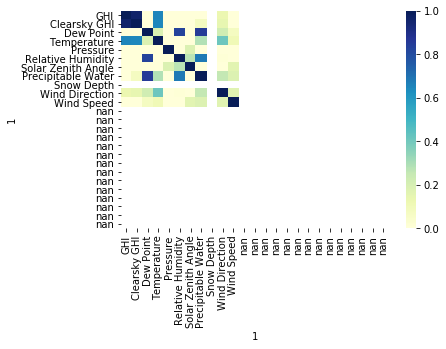

In [10]:
corr_hm = sns.heatmap(year.corr(), 
                xticklabels=year.corr().columns,
                yticklabels=year.corr().columns,vmin=0,vmax=1,cmap="YlGnBu")
plt.show()
# plt.tight_layout()

corr_hm.figure.savefig("../docs/corr_heatmap.png",dpi=200,bbox_inches = "tight")

# Density plot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

'''
Lognorm: Instead of pcolor log10(Z1) you can have colorbars that have
the exponential labels using a norm.
'''
N = 100
X, Y = np.mgrid[-3:3:complex(0, N), -2:2:complex(0, N)]
print(X)
# X = year_all.pop('Day')
# Y = year_all.pop('Hour')
# print(X)
# A low hump with a spike coming out of the top right.  Needs to have
# z/colour axis on a log scale so we see both hump and spike.  linear
# scale only shows the spike.
Z = np.exp(-X**2 - Y**2)
# Z = Y = year.pop('GHI')
print(Z)
# fig, ax = plt.subplots(1, 1)

# pcm = ax[0].pcolor(X, Y, Z,
#                    norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
#                    cmap='PuBu_r')
# fig.colorbar(pcm, ax=ax[0], extend='max')

plt.pcolor(X, Y, Z, cmap='PuBu_r')
plt.colorbar(pcm, extend='max')

plt.show()

In [ ]:
day_of_year = year_all.pop('Day')

In [ ]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');